In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

# import scipy


In [ ]:
df = pd.read_csv('data/health.csv')
display(df.head())

,systolic,weight,height,bmi,waist,age,diabetes,smoker,fastfood
0,100,98.6,172.0,33.3,120.4,43,0,1,5
1,112,96.9,186.0,28.0,107.8,57,0,0,0
2,134,108.2,154.4,45.4,120.3,38,0,1,2
3,108,84.8,168.9,29.7,109.0,75,0,0,1
4,128,97.0,175.3,31.6,111.1,42,0,1,1


In [ ]:
# Kolumny numeryczne
numeric_cols = ['systolic', 'weight', 'height', 'bmi', 'waist', 'age', 'fastfood']
boolean_cols = ['diabetes', 'smoker']
all_cols = numeric_cols + boolean_cols

['systolic', 'weight', 'height', 'bmi', 'waist', 'age', 'fastfood', 'diabetes', 'smoker']


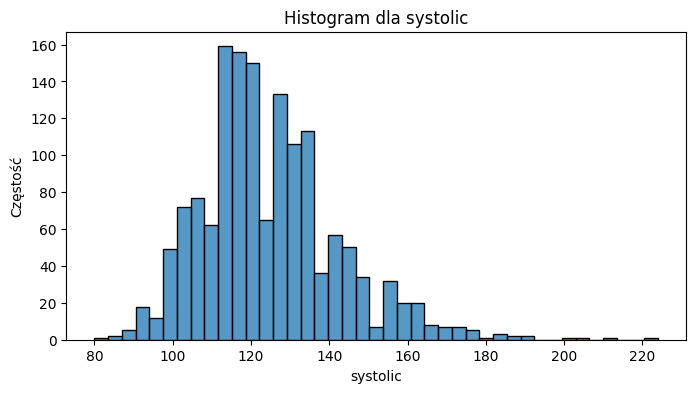

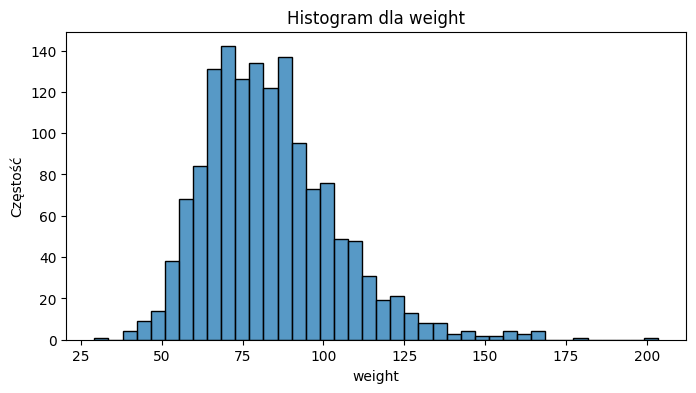

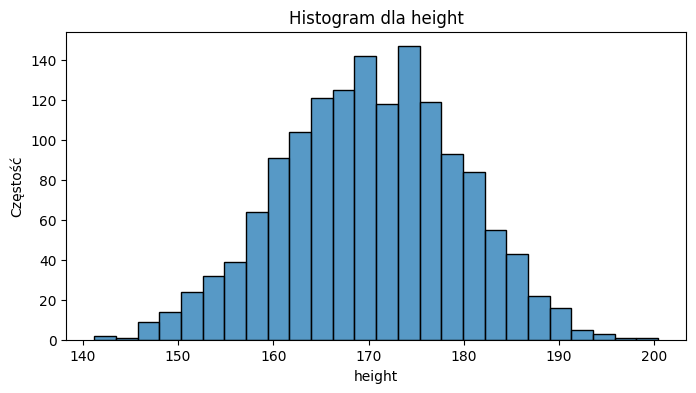

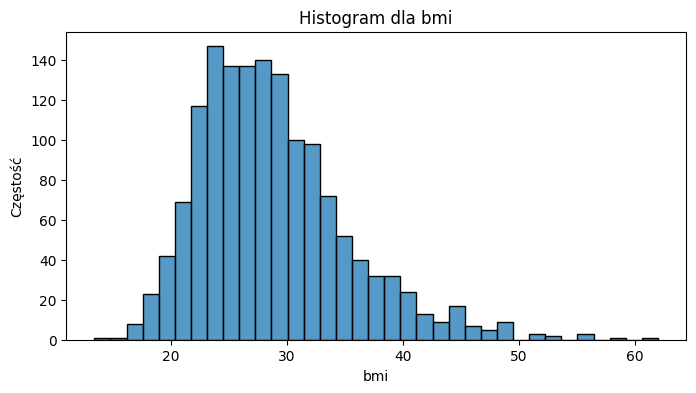

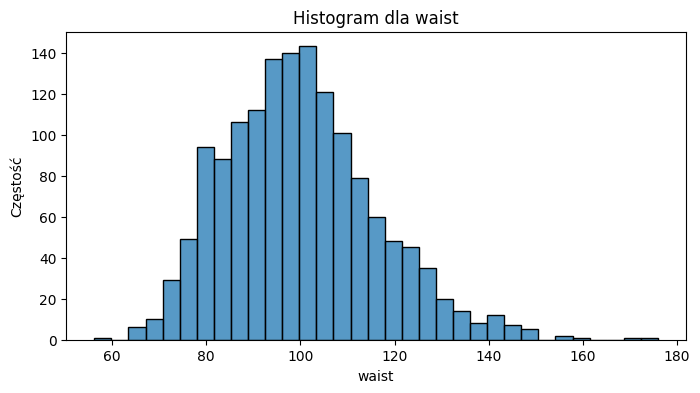

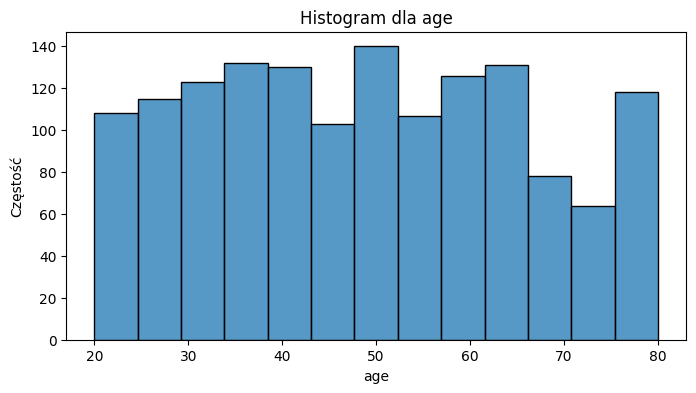

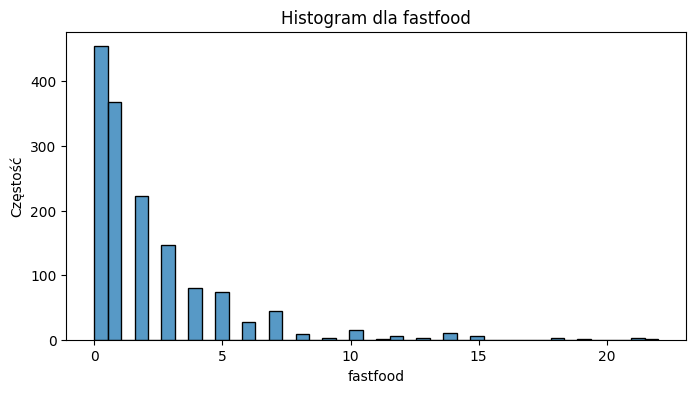

In [22]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col]) # type: ignore
    plt.title(f"Histogram dla {col}")
    plt.xlabel(col)
    plt.ylabel("Częstość")
    plt.show()


Histogramy:
- Systolic, Weight, Height, BMI oraz Waist: wyglądają na rozkłady normalne
- Age: relatywnie równa dystrybucja - pacjenci w różnym wieku
- Fast Food - większość pacjentów rzadko spożywa fasd food, lecz są osoby daleko na prawo

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Wykres pudełkowy dla {col}")
    plt.show()

In [ ]:
statistics = pd.DataFrame({
    'Średnia': df[numeric_cols].mean(),
    'Mediana': df[numeric_cols].median(),
    'Odchylenie standardowe': df[numeric_cols].std()
})

display(statistics)

             Średnia  Mediana  Odchylenie standardowe
systolic  124.729492    122.0               17.620588
weight     83.563186     81.0               20.582301
height    170.179932    170.3                9.326330
bmi        28.793966     27.9                6.470551
waist     100.034508     98.9               16.153663
age        48.886780     49.0               16.975321
fastfood    2.139661      1.0                2.872604



| | Średnia | Mediana | Odchylenie standardowe |
|---|---|---|---|
systolic | 124.729492   | 122.0        |       17.620588
weight  |   83.563186  |   81.0        |       20.582301
height   | 170.179932  |  170.3         |       9.326330
bmi     |   28.793966   |  27.9          |      6.470551
waist   |  100.034508    | 98.9           |    16.153663
age      |  48.886780   |  49.0            |   16.975321
fastfood  |  2.139661    |  1.0              |  2.872604

#### Wnioski
- ciśnienie średnie 124, lecz odchylenie standardowe sugeruje że część grupy może mieć nadciścnienie
- większość grupy je mało fastfoodów (mediana = 1), lecz średnia i duże odchylenie wskazują na nielicznych częstych konsumentów, którzy mogą wpływać na średnią.
- Duże odchylenia standardowe dla weight, waist, age i fastfood sugerują zróżnicowanie grupy

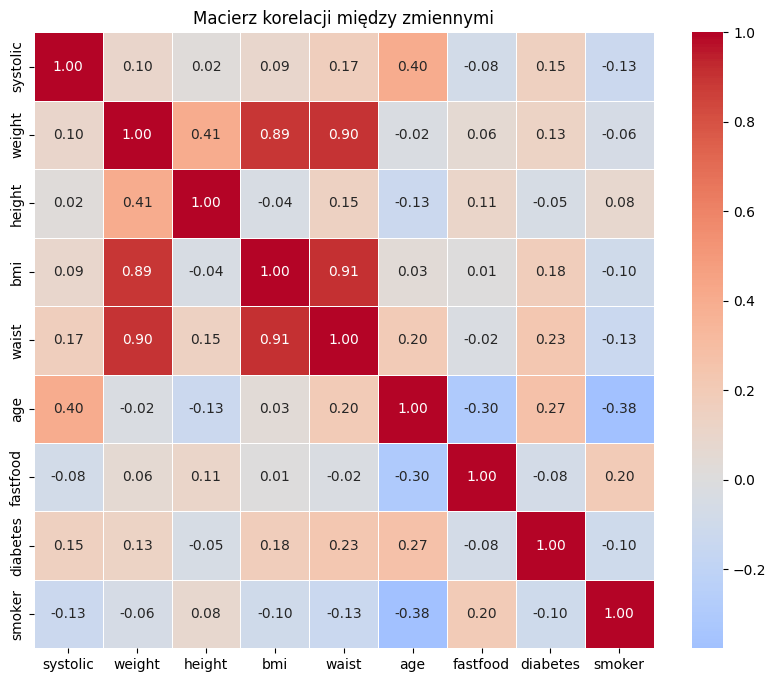

          systolic    weight    height       bmi     waist       age  \
systolic  1.000000  0.100214  0.023010  0.090547  0.168130  0.401709   
weight    0.100214  1.000000  0.406220  0.891528  0.899288 -0.022172   
height    0.023010  0.406220  1.000000 -0.038482  0.145447 -0.126570   
bmi       0.090547  0.891528 -0.038482  1.000000  0.912537  0.033798   
waist     0.168130  0.899288  0.145447  0.912537  1.000000  0.195088   
age       0.401709 -0.022172 -0.126570  0.033798  0.195088  1.000000   
fastfood -0.084175  0.057707  0.109171  0.010035 -0.021673 -0.300898   
diabetes  0.153854  0.131331 -0.049255  0.176302  0.225695  0.266601   
smoker   -0.125618 -0.056086  0.083132 -0.100203 -0.132229 -0.376567   

          fastfood  diabetes    smoker  
systolic -0.084175  0.153854 -0.125618  
weight    0.057707  0.131331 -0.056086  
height    0.109171 -0.049255  0.083132  
bmi       0.010035  0.176302 -0.100203  
waist    -0.021673  0.225695 -0.132229  
age      -0.300898  0.266601 -0.3

In [40]:
# for method in ['pearson', 'kendall', 'spearman']:

corr_matrix = df[all_cols].corr(method='pearson') 

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    linewidths=.5
)
plt.title(f"Macierz korelacji między zmiennymi")
plt.show()

print(corr_matrix)

### Analiza Korelacji

#### Skurczowe ciśnienie krwi
 - Największa korelacja z wiekiem
 - Lekka korelacja z palaczami, cukrzykami oraz z obwodem pasa
 - Słaba korelacja lub jej brak z innymi zmiennymi 

#### Inne
 - Silna korelacja między Wysokością, Obwódem w pasie, wysokością oraz BMI
 - Średnia korelacja między wiekiem, cukrzykami i palaczami
 - Lekka korelacja między wiekiem a szerokością pasa
 - Lekka korelacja między spożywaniem fast foodów oraz paleniem

## Wybór Modeli

### 1. Wiek

Wiek miał największy współczynnik korelacji, więc zbadamy czy ma wpływ na ciśnienie.

**Hipoteza Zerowa**

Wiek nie ma wpływu na ciśnienie

### 2. Palacze oraz cukrzycy

Obie zmienne miały lekką korelację z ciśnieniem

**Hipoteza Zerowa**

Palenie oraz cukrzyca nie wpływa na ciśnienie

### 3. Obwód Pasa, BMI oraz fast food

Obie zmienne miały lekką korelację z ciśnieniem

**Hipoteza Zerowa**

Dieta nie ma wpływu na ciśnienie

In [124]:
# Przygotowanie danych (dodanie stałej dla wyrazu wolnego)
df['intercept'] = 1

# 1. Model: systolic ~ age
model1 = ols('systolic ~ age', data=df).fit()

# 2. Model: systolic ~ smoker + diabetes
model2 = ols('systolic ~ smoker + diabetes', data=df).fit()

# 3. Model: systolic ~ waist + fastfood + bmi
model3 = ols('systolic ~ waist + fastfood + bmi', data=df).fit()

# Porównanie Adjusted R²
results = pd.DataFrame({
    'Model': [
        'systolic ~ age',
        'systolic ~ smoker + diabetes',
        'systolic ~ waist + fastfood + bmi'
    ],
    'R^2': [model1.rsquared, model2.rsquared, model3.rsquared],
    'Adjusted R^2': [model1.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj],
    "p-value (F-statistic)": [model1.f_pvalue, model2.f_pvalue, model3.f_pvalue]
})

display(results)

# print(model1.summary())


,Model,R^2,Adjusted R^2,p-value (F-statistic)
0,systolic ~ age,0.161370,0.160801,2.641510e-58
1,systolic ~ smoker + diabetes,0.035868,0.034558,2.111308e-12
2,systolic ~ waist + fastfood + bmi,0.056737,0.054814,1.621872e-18


In [121]:
# Wzory
def wzor(model, params):
    wz = " systolic = {:.2f}".format(model.params["Intercept"])
    for param in params:
        wz += " + {:.2f} * {:s}".format(model.params[param], param)
    return wz

print(wzor(model1, ["age"]))
print(wzor(model2, ["smoker", "diabetes"]))
print(wzor(model3, ["waist", "fastfood", "bmi"]))

 systolic = 104.34 + 0.42 * age
 systolic = 125.58 + -3.92 * smoker + 7.18 * diabetes
 systolic = 99.77 + 0.54 * waist + -0.43 * fastfood + -0.99 * bmi


## Wzory

| model | wzór |
| --- | --- |
systolic ~ age |systolic = 104.34 + 0.42 * age
systolic ~ smoker + diabetes | systolic = 125.58 + -3.92 * smoker + 7.18 * diabetes
systolic ~ waist + fastfood + bmi | systolic = 99.77 + 0.54 * waist + -0.43 * fastfood + -0.99 * bmi



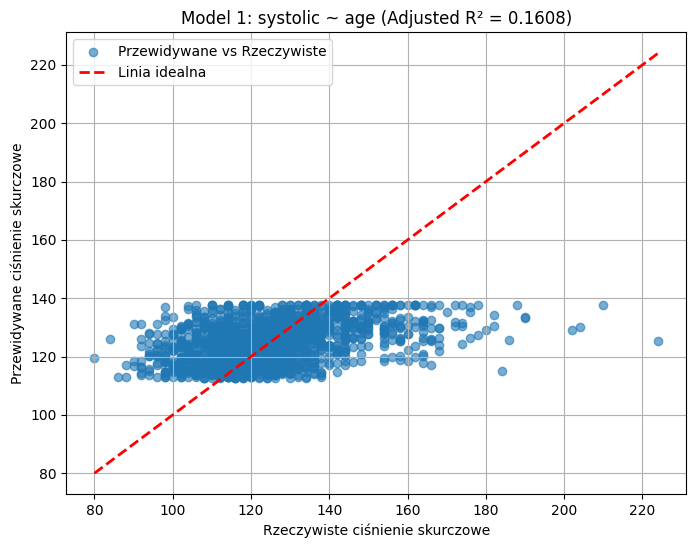

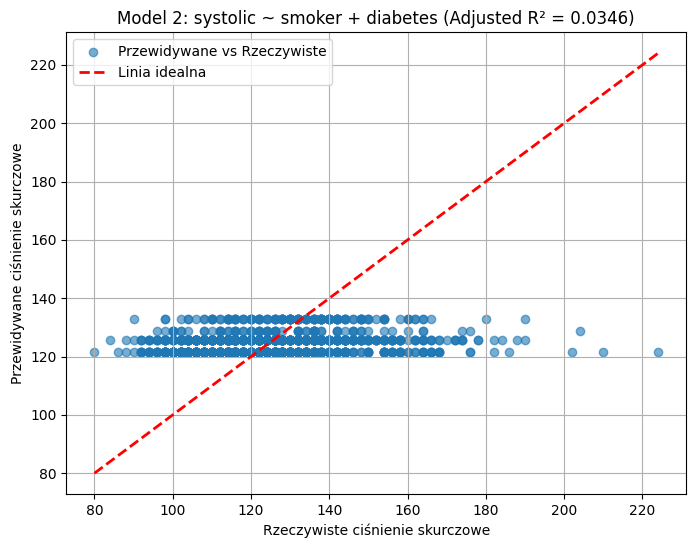

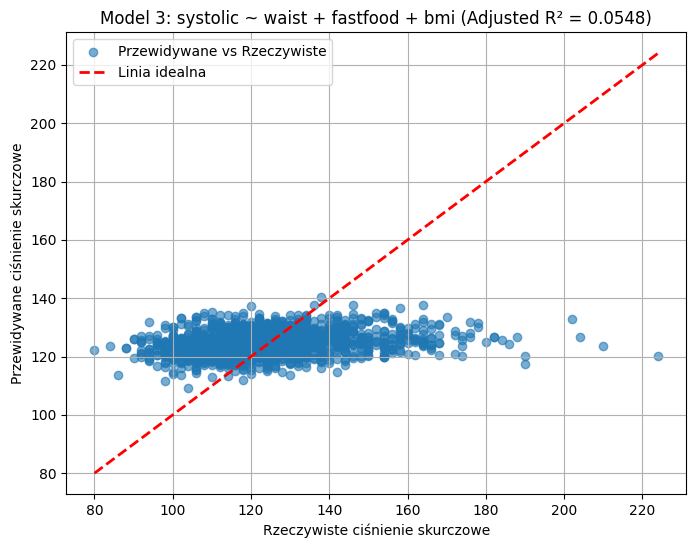

In [122]:
# Funkcja do rysowania wykresu dopasowania modelu
def plot_model_fit(model, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(df['systolic'], model.fittedvalues, alpha=0.6, label='Przewidywane vs Rzeczywiste')
    plt.plot([df['systolic'].min(), df['systolic'].max()],
             [df['systolic'].min(), df['systolic'].max()],
             'r--', lw=2, label='Linia idealna')
    plt.xlabel('Rzeczywiste ciśnienie skurczowe')
    plt.ylabel('Przewidywane ciśnienie skurczowe')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Wczytanie modeli (zakładam, że masz już dopasowane modele: model1, model2, model3)

# Wykres dla Modelu 1: systolic ~ age
plot_model_fit(model1, 'Model 1: systolic ~ age (Adjusted R² = {:.4f})'.format(model1.rsquared_adj))

# Wykres dla Modelu 2: systolic ~ smoker + diabetes
plot_model_fit(model2, 'Model 2: systolic ~ smoker + diabetes (Adjusted R² = {:.4f})'.format(model2.rsquared_adj))

# Wykres dla Modelu 3: systolic ~ waist + fastfood
plot_model_fit(model3, 'Model 3: systolic ~ waist + fastfood + bmi (Adjusted R² = {:.4f})'.format(model3.rsquared_adj))


In [123]:
# plt.scatter(model1.fittedvalues, model1.resid)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel('Przewidywane wartości')
# plt.ylabel('Reszty')
# plt.title('Wykres reszt dla Modelu 1')
# plt.show()